# **Data Specs**

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jessemostipak/hotel-booking-demand")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'hotel-booking-demand' dataset.
Path to dataset files: /kaggle/input/hotel-booking-demand


In [5]:
import os
import pandas as pd
os.listdir(path)

['hotel_bookings.csv']

In [6]:
df = pd.read_csv(os.path.join(path, "hotel_bookings.csv"))
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [7]:
df.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [8]:
df.shape

(119390, 32)

In [183]:
cols_to_drop = [
    "company",
    "reservation_status_date",
    "arrival_date_week_number",
    "arrival_date_day_of_month",
    "assigned_room_type",
    "reservation_status",

]

Certain columns did not contribute meaningful analytical value or were known to be redundant. These were removed to simplify the dataset and focus on variables that improve insight.

In [179]:
df['total_guests'] = df['adults'] + df['children'] + df['babies']


created a travel party size feature

In [185]:
season_map = {
    'December':'Winter', 'January':'Winter', 'February':'Winter',
    'March':'Spring', 'April':'Spring', 'May':'Spring',
    'June':'Summer', 'July':'Summer', 'August':'Summer',
    'September':'Fall', 'October':'Fall', 'November':'Fall'
}

df['season'] = df['arrival_date_month'].map(season_map)


Encoding season from months

In [15]:
df_sample = df.sample(n=12000, random_state=42)

In [16]:
df_sample.shape

(12000, 25)

In [17]:
df_sample.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
stays_in_weekend_nights,0
adults,0
children,0
babies,0
meal,0


In [18]:
df_sample.dtypes

,0
hotel,object
is_canceled,int64
lead_time,int64
arrival_date_year,int64
arrival_date_month,object
stays_in_weekend_nights,int64
adults,int64
children,float64
babies,int64
meal,object


In [19]:
df_sample.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,stays_in_weekend_nights,adults,children,babies,meal,...,previous_bookings_not_canceled,reserved_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
30946,Resort Hotel,0,203,2016,December,2,2,0.0,0,BB,...,0,F,4,No Deposit,250.0,0,Transient,66.8,0,0
40207,City Hotel,1,82,2015,July,0,2,0.0,0,BB,...,0,A,0,No Deposit,9.0,0,Transient,76.5,0,0
103708,City Hotel,0,25,2016,December,0,3,0.0,0,BB,...,0,A,2,No Deposit,220.0,0,Transient-Party,60.0,0,1
85144,City Hotel,0,1,2016,March,0,1,0.0,0,BB,...,0,A,0,No Deposit,9.0,0,Transient-Party,95.0,0,0
109991,City Hotel,0,70,2017,April,2,2,0.0,0,SC,...,0,A,0,No Deposit,9.0,0,Transient,108.0,0,0


This dataset represents hotel reservation records for both city and resort hotels.
Each row represents a single booking and includes details about guest counts, stay duration, booking channels, financial metrics (ADR), and cancellation status.
The goal is to understand patterns in customer behavior, booking characteristics, and what factors influence cancellations.

# **Data** **Cleaning**

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
df_sample["country"] = df_sample["country"].fillna("Unknown")
df_sample["agent"] = df_sample["agent"].fillna(0).astype(int)


Handle Missing Values

In [118]:
df_sample["children"] = df_sample["children"].astype(int)
df_sample["agent"] = df_sample["agent"].astype(int)

convert agent and children columns to numerical

In [119]:
categorical_cols = [
    "arrival_date_month",
    "country",
    "market_segment",
    "distribution_channel",
    "deposit_type",
    "meal",
    "customer_type",
    "reserved_room_type",
]

for col in categorical_cols:
    df_sample[col] = df_sample[col].astype("category")

Convert categorical columns

In [33]:
print("Missing values after cleaning:")
print(df_sample.isnull().sum())

print("\nData types after cleaning:")
print(df_sample.dtypes)

Missing values after cleaning:
hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
stays_in_weekend_nights           0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
dtype: int64

Data types after cleaning:
hotel                       

# **UNIVARIATE** **ANALYSIS**

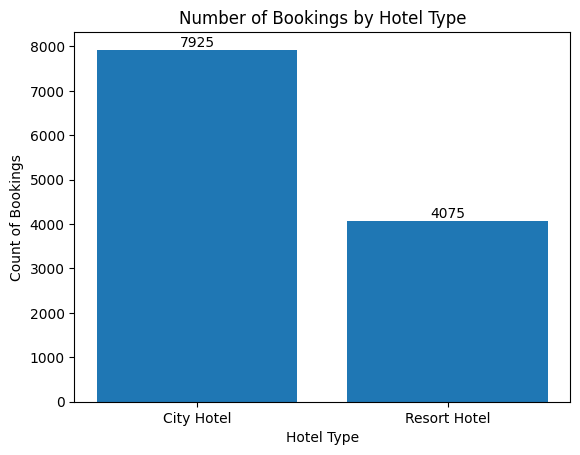

In [186]:
counts = df_sample['hotel'].value_counts()

plt.bar(counts.index, counts.values)
plt.title("Number of Bookings by Hotel Type")
plt.xlabel("Hotel Type")
plt.ylabel("Count of Bookings")

for i in range(len(counts)):
    plt.text(i, counts.values[i], counts.values[i], ha='center', va='bottom')

plt.show()

The dataset contains significantly more reservations for City Hotels compared to Resort Hotels.
This indicates that most bookings come from urban environments, likely driven by business travel and short city stays. Resort Hotels receive fewer reservations, suggesting that leisure or vacation-oriented travel is less frequent or more seasonal.

In [37]:
df_sample['arrival_date_month'].value_counts()


,count
arrival_date_month,
August,1368
July,1281
May,1173
June,1116
October,1114
April,1098
September,1075
March,960
February,830


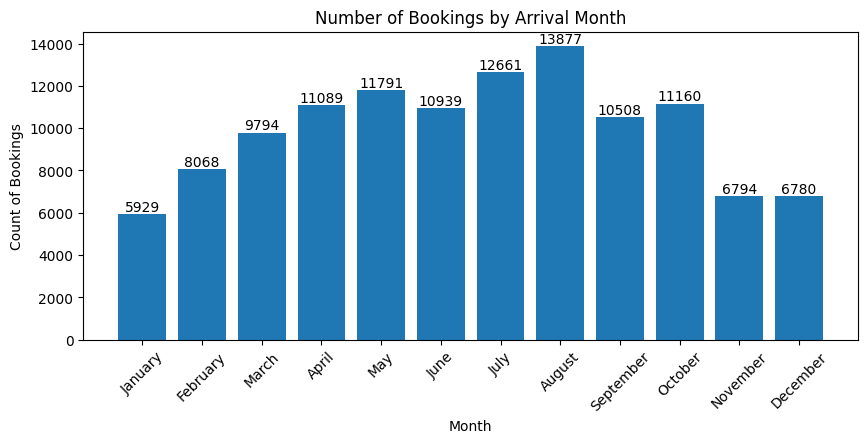

In [187]:
month_counts = df['arrival_date_month'].value_counts().loc[
    ["January","February","March","April","May","June",
     "July","August","September","October","November","December"]
]

plt.figure(figsize=(10,4))
plt.bar(month_counts.index, month_counts.values)
plt.title("Number of Bookings by Arrival Month")
plt.xlabel("Month")
plt.ylabel("Count of Bookings")
plt.xticks(rotation=45)

for i in range(len(month_counts)):
    plt.text(i, month_counts.values[i], month_counts.values[i], ha='center', va='bottom')

plt.show()


Bookings peak during the summer months:
*   August (1,368)
*   July (1,281)
*   May & June (1,173 and 1,116)

These months represent the strongest travel season, likely driven by vacations, holidays, and warm-weather tourism — especially for Resort Hotels.
Demand gradually decreases after the summer, with October, April, and September still showing strong volumes.
The lowest demand occurs in the winter months, particularly:
*   January (612)
*   November (668)
*   December (705)

This reflects typical off-season travel behavior, with fewer trips due to weather, school schedules, and year-end commitments.













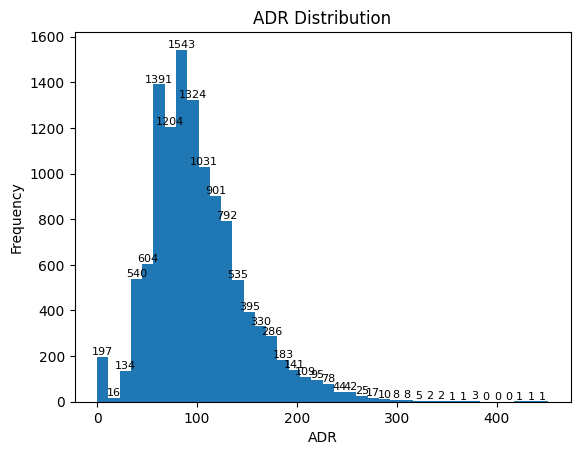

In [188]:
counts, bins, patches = plt.hist(df_sample['adr'], bins=40)

for i in range(len(patches)):
    plt.text(
        patches[i].get_x() + patches[i].get_width()/2,
        counts[i],
        int(counts[i]),
        ha='center',
        va='bottom',
        fontsize=8
    )

plt.title("ADR Distribution")
plt.xlabel("ADR")
plt.ylabel("Frequency")
plt.show()


The ADR distribution is right-skewed, with most room rates falling between 50 and 150. This indicates that the majority of bookings are priced in a moderate range. As the histogram shows, the frequency quickly drops as ADR increases, and only a small number of bookings exceed 200, with very few reaching the 300–400 range.

Overall, this pattern suggests that mid-priced rooms dominate the dataset, while high-priced or luxury stays occur much less frequently.

In [56]:
adult_counts= df_sample['adults'].value_counts().sort_index()
adult_counts

,count
adults,
0,45
1,2223
2,9130
3,595
4,5
5,1
55,1


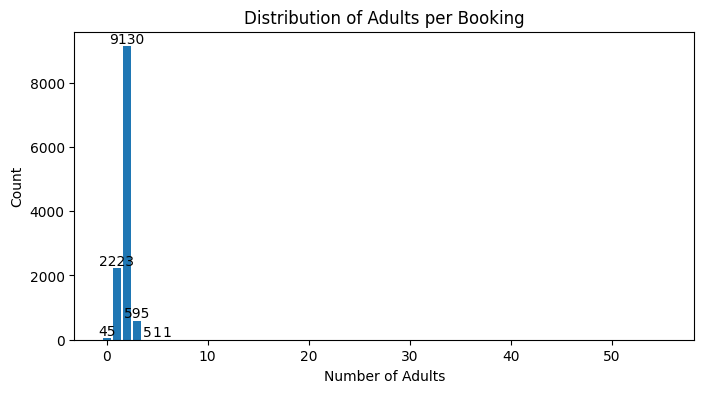

In [189]:
plt.figure(figsize=(8,4))
plt.bar(adult_counts.index, adult_counts.values)
plt.title("Distribution of Adults per Booking")
plt.xlabel("Number of Adults")
plt.ylabel("Count")

for i in range(len(adult_counts)):
    plt.text(i, adult_counts.values[i], adult_counts.values[i], ha='center', va='bottom')

plt.show()


Most bookings include two adults, with 9,130 entries, making it the dominant category. Single-adult bookings are also common, totaling 2,223, likely reflecting solo business travelers or individual stays.

Bookings with three adults appear occasionally (595), but values above 3 are extremely rare. The entry with 55 adults is highly likely to be data-entry errors or unusual outliers, as standard hotel rooms rarely accommodate such large numbers.

Overall, the data suggests that hotel stays are primarily made by individual travelers or adult pairs, which aligns with common hotel occupancy patterns.

In [60]:
child_counts= df_sample['children'].value_counts().sort_index()
child_counts

,count
children,
0,11126
1,489
2,373
3,12


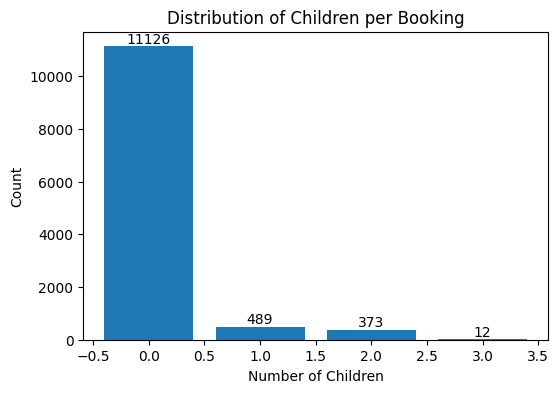

In [190]:
plt.figure(figsize=(6,4))
plt.bar(child_counts.index, child_counts.values)
plt.title("Distribution of Children per Booking")
plt.xlabel("Number of Children")
plt.ylabel("Count")

for i in range(len(child_counts)):
    plt.text(i, child_counts.values[i], child_counts.values[i], ha='center', va='bottom')

plt.show()


Most bookings include no children, with 11,126 records, highlighting that the majority of guests are adults traveling without kids. Bookings with one or two children occur occasionally (489 and 373 respectively), while bookings with three children are very rare (12 entries).

This distribution shows that families with children make up a small minority of hotel reservations in this dataset, which aligns with the high volume of city hotel bookings—typically more oriented toward adults and business travelers.

In [63]:
baby_counts= df_sample['babies'].value_counts().sort_index()
baby_counts

,count
babies,
0,11922
1,74
2,3
9,1


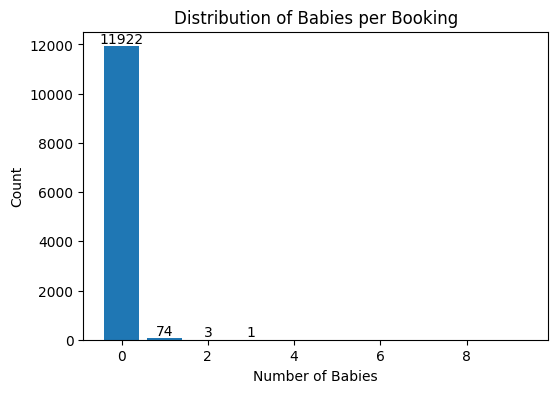

In [191]:
plt.figure(figsize=(6,4))
plt.bar(baby_counts.index, baby_counts.values)
plt.title("Distribution of Babies per Booking")
plt.xlabel("Number of Babies")
plt.ylabel("Count")

for i in range(len(baby_counts)):
    plt.text(i, baby_counts.values[i], baby_counts.values[i], ha='center', va='bottom')

plt.show()


Almost all bookings include no babies, with 11,922 records showing zero infants. Bookings including one baby are rare (74), and entries with two babies are extremely uncommon (3). The single entry with nine babies is almost certainly a data-entry error.

Overall, this variable shows that hotel stays involving infants are very unusual, reinforcing that the dataset is dominated by adult and small-family travel.

In [66]:
cust_counts= df_sample['customer_type'].value_counts()
cust_counts

,count
customer_type,
Transient,9050
Transient-Party,2467
Contract,430
Group,53


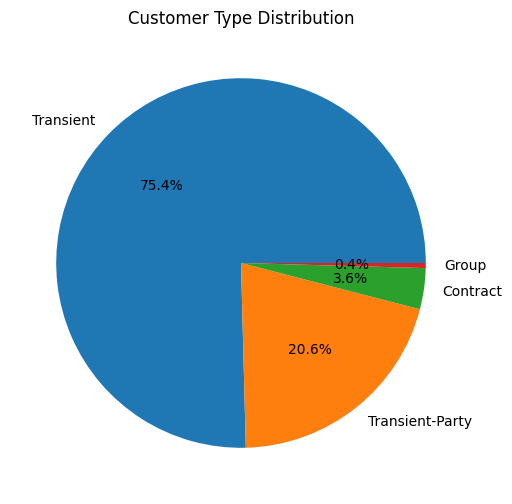

In [67]:
plt.figure(figsize=(6,6))
plt.pie(
    cust_counts.values,
    labels=cust_counts.index,
    autopct='%1.1f%%'
)
plt.title("Customer Type Distribution")
plt.show()


Most customers are Transient, making up the majority with 9,050 bookings. These are individuals or couples booking short stays, often for leisure or business. The second-largest group is Transient-Party with 2,467 bookings, representing small groups traveling together.

Contract customers account for a much smaller portion (430), and Group customers represent only 53 bookings, showing that large organized groups are very uncommon in this dataset.

Overall, the customer base is heavily dominated by independent travelers, which aligns with the high number of city hotel reservations seen earlier.

In [69]:
segment_counts= df_sample['market_segment'].value_counts()
segment_counts

,count
market_segment,
Online TA,5639
Offline TA/TO,2453
Groups,2032
Direct,1279
Corporate,500
Complementary,71
Aviation,26


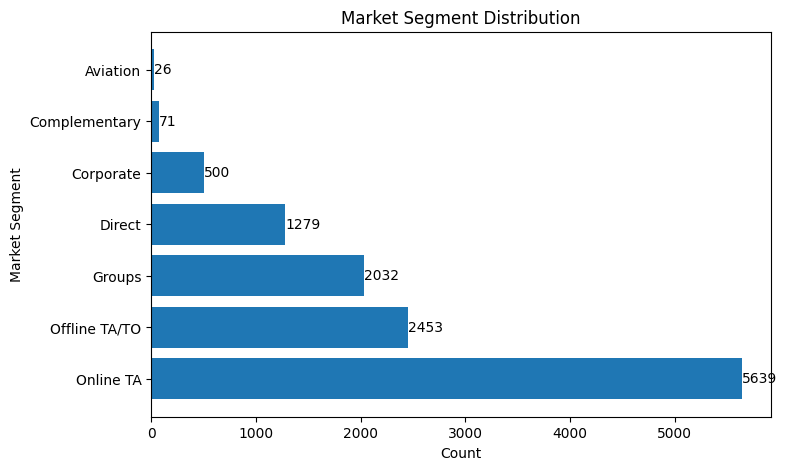

In [192]:
plt.figure(figsize=(8,5))
plt.barh(segment_counts.index, segment_counts.values)
plt.title("Market Segment Distribution")
plt.xlabel("Count")
plt.ylabel("Market Segment")

for i in range(len(segment_counts)):
    plt.text(segment_counts.values[i], i, segment_counts.values[i], va='center')

plt.show()


Most bookings come from Online Travel Agencies (5,639), making them the dominant source of reservations. Offline TA/TO channels follow with 2,453 bookings, showing that both digital and traditional travel agencies are important contributors.

Group bookings also represent a significant share (2,032), suggesting organized travel or event-related stays. Direct bookings (1,279) appear less frequently, indicating that many customers prefer intermediaries for reservations.

Corporate bookings account for 500 entries, while Complementary and Aviation segments are extremely rare, with 71 and 26 bookings respectively.

Overall, the market is heavily driven by online reservations, aligning with modern travel patterns.

In [72]:
channel_counts= df_sample['distribution_channel'].value_counts()
channel_counts

,count
distribution_channel,
TA/TO,9813
Direct,1516
Corporate,650
GDS,21


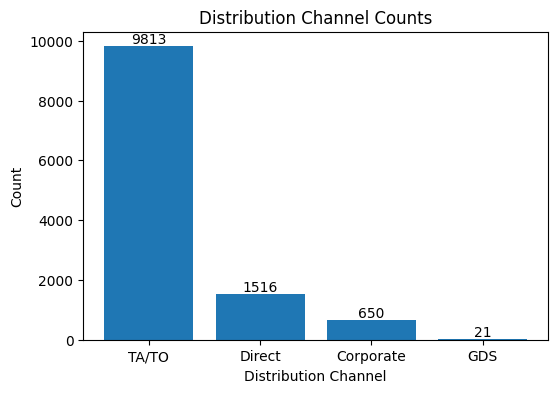

In [193]:
plt.figure(figsize=(6,4))
plt.bar(channel_counts.index, channel_counts.values)
plt.title("Distribution Channel Counts")
plt.xlabel("Distribution Channel")
plt.ylabel("Count")

for i in range(len(channel_counts)):
    plt.text(i, channel_counts.values[i], channel_counts.values[i],
             ha='center', va='bottom')

plt.show()



The majority of reservations are made through TA/TO channels (9,813), indicating that travel agents and tour operators play a major role in generating bookings for these hotels. Direct bookings are much fewer (1,516), suggesting that fewer guests reserve through the hotel’s own website or reservation desk.

Corporate channels contribute 650 bookings, reflecting business travel handled through company arrangements. The GDS channel, commonly used in airline and travel agency networks, is extremely rare with only 21 bookings.

Overall, the data shows that third-party intermediaries dominate the reservation flow, consistent with modern travel behavior driven by online and offline agencies.

In [75]:
cancel_counts= df_sample['is_canceled'].value_counts()
cancel_counts

,count
is_canceled,
0,7471
1,4529


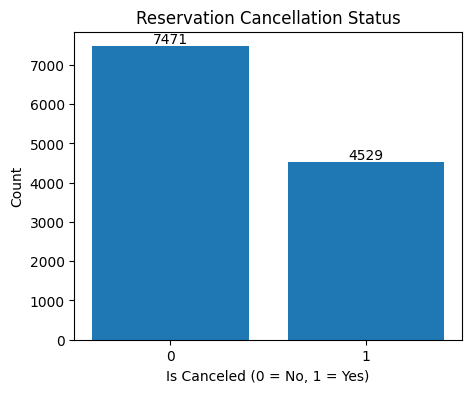

In [194]:
plt.figure(figsize=(5,4))
plt.bar(cancel_counts.index.astype(str), cancel_counts.values)
plt.title("Reservation Cancellation Status")
plt.xlabel("Is Canceled (0 = No, 1 = Yes)")
plt.ylabel("Count")

for i in range(len(cancel_counts)):
    plt.text(i, cancel_counts.values[i], cancel_counts.values[i],
             ha='center', va='bottom')

plt.show()



Out of 12,000 bookings in the sample, 7,471 reservations were not canceled, while 4,529 were canceled, meaning roughly 38% of bookings were canceled. This represents a significant portion of reservations, showing that cancellation behavior is a major factor in hotel operations.

The high cancellation rate suggests that guests frequently change or abandon travel plans, possibly influenced by pricing strategies, long lead times, or flexible cancellation policies. This variable will be especially important in later analysis when examining what factors contribute to higher cancellation rates.

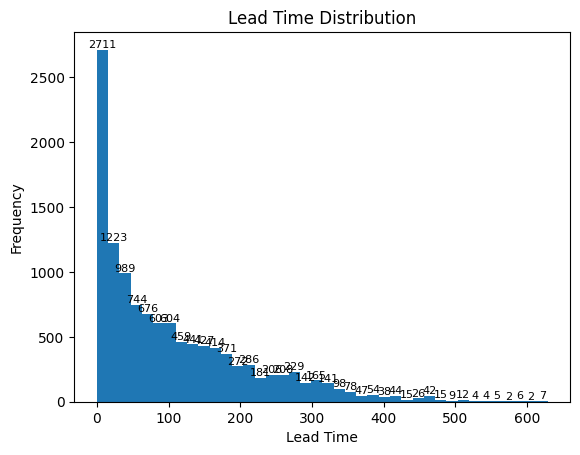

In [195]:
counts, bins, patches = plt.hist(df_sample['lead_time'], bins=40)

for i in range(len(counts)):
    plt.text(
        patches[i].get_x() + patches[i].get_width()/2,
        counts[i],
        int(counts[i]),
        ha='center',
        va='bottom',
        fontsize=8
    )

plt.title("Lead Time Distribution")
plt.xlabel("Lead Time")
plt.ylabel("Frequency")
plt.show()


The lead time distribution is right-skewed, meaning most bookings are made close to the arrival date. A large number of reservations fall within the first 0–50 days, and the frequency decreases as lead time increases. Only a small portion of guests book far in advance, with values extending up to over 600 days.

This shows that short-notice bookings are very common, while long-term planning is less frequent.

In [77]:
df_sample['arrival_date_year'].value_counts().sort_index()


,count
arrival_date_year,
2015,2213
2016,5704
2017,4083


In [80]:
weekend_counts= df_sample['stays_in_weekend_nights'].value_counts().sort_index()
weekend_counts

,count
stays_in_weekend_nights,
0,5209
1,3061
2,3368
3,121
4,208
5,10
6,16
7,2
8,3


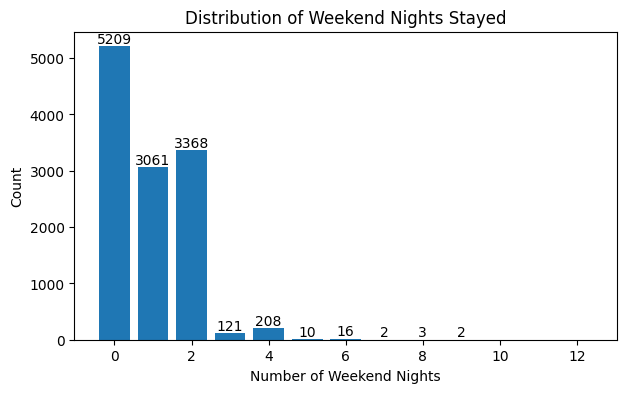

In [196]:
plt.figure(figsize=(7,4))
plt.bar(weekend_counts.index, weekend_counts.values)
plt.title("Distribution of Weekend Nights Stayed")
plt.xlabel("Number of Weekend Nights")
plt.ylabel("Count")

for i in range(len(weekend_counts)):
    plt.text(i, weekend_counts.values[i], weekend_counts.values[i],
             ha='center', va='bottom')

plt.show()



Most guests stay zero or one weekend night, with 5,209 bookings having no weekend stay and 3,061 staying for one night. Stays of two weekend nights are also common (3,368 bookings), consistent with typical short leisure trips such as weekend getaways.

Longer weekend stays (three nights or more) are very uncommon, with counts dropping sharply beyond two nights. Extremely long weekend stays, such as 7, 8, or 12 nights, are rare outliers, possibly representing extended vacations or data inconsistencies.

Overall, the distribution highlights that most guests spend only one or two nights over the weekend, reflecting typical short-trip behavior.

In [84]:
prev_cancel_counts= df_sample['previous_cancellations'].value_counts().sort_index()
prev_cancel_counts

,count
previous_cancellations,
0,11333
1,627
2,9
3,10
4,1
5,3
11,4
13,1
14,1


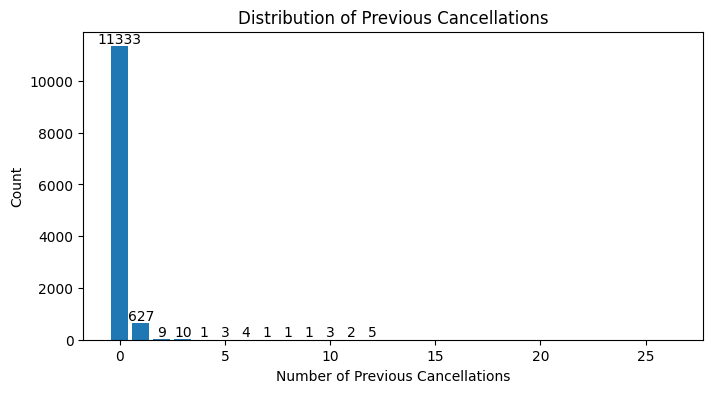

In [197]:
plt.figure(figsize=(8,4))
plt.bar(prev_cancel_counts.index, prev_cancel_counts.values)
plt.title("Distribution of Previous Cancellations")
plt.xlabel("Number of Previous Cancellations")
plt.ylabel("Count")

for i in range(len(prev_cancel_counts)):
    plt.text(i, prev_cancel_counts.values[i], prev_cancel_counts.values[i],
             ha='center', va='bottom')

plt.show()


Most guests (11,333) have no previous cancellations, showing that the majority of customers are reliable and have not canceled bookings before. A smaller group (627 guests) has canceled once in the past.

Beyond one previous cancellation, the counts drop dramatically. Small numbers of guests have canceled multiple times, with unusual values like 11, 19, 24, 25, and 26 previous cancellations. These are likely highly unreliable customers or may reflect booking system anomalies or bulk booking cancellations.

Overall, guests with multiple previous cancellations are extremely rare, but they may significantly influence cancellation patterns later in bivariate analysis.

In [88]:
repeat_counts= df_sample['is_repeated_guest'].value_counts()
repeat_counts

,count
is_repeated_guest,
0,11639
1,361


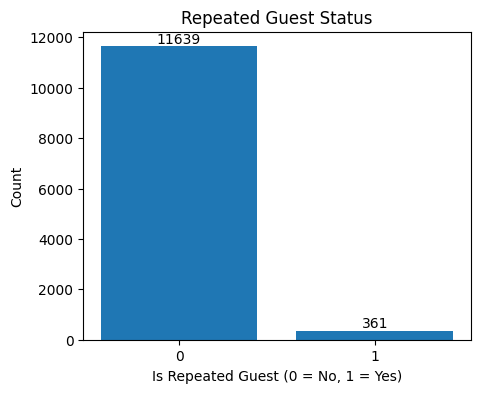

In [198]:
plt.figure(figsize=(5,4))
plt.bar(repeat_counts.index.astype(str), repeat_counts.values)
plt.title("Repeated Guest Status")
plt.xlabel("Is Repeated Guest (0 = No, 1 = Yes)")
plt.ylabel("Count")

for i in range(len(repeat_counts)):
    plt.text(i, repeat_counts.values[i], repeat_counts.values[i],
             ha='center', va='bottom')

plt.show()



The vast majority of customers (11,639) are first-time guests, while only 361 bookings come from repeated guests. This indicates that loyalty levels are relatively low within this sample, and most reservations come from new or one-time visitors.

The small number of repeated guests may reflect the nature of city hotels, which often serve business travelers, tourists, and short-stay customers who do not frequently return.

This variable will later help in bivariate analysis, especially when examining whether repeated guests behave differently in terms of cancellations or booking changes.

In [91]:
room_counts= df_sample['reserved_room_type'].value_counts().sort_index()
room_counts

,count
reserved_room_type,
A,8690
B,119
C,104
D,1888
E,635
F,295
G,207
H,61
P,1


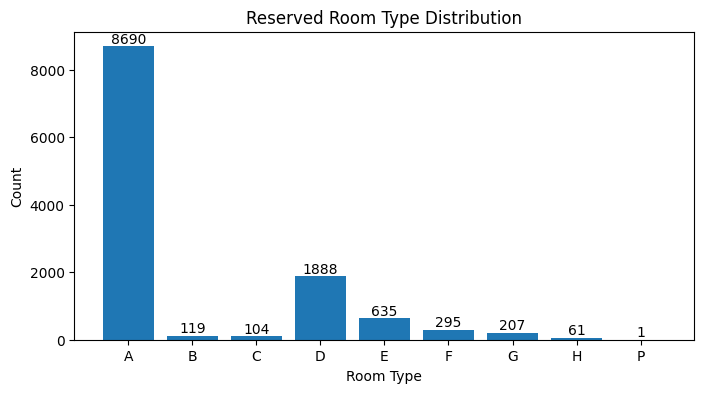

In [200]:
plt.figure(figsize=(8,4))
plt.bar(room_counts.index, room_counts.values)
plt.title("Reserved Room Type Distribution")
plt.xlabel("Room Type")
plt.ylabel("Count")

for i in range(len(room_counts)):
    plt.text(i, room_counts.values[i], room_counts.values[i],
             ha='center', va='bottom')

plt.show()



Room type A dominates reservations with 8,690 bookings, suggesting it is the most commonly available or preferred option—likely a standard room class. Room type D is the next most reserved (1,888 bookings), while all other types appear far less frequently.

Room types B, C, E, F, G, and H represent smaller portions of bookings, possibly indicating limited availability, higher price points, or less common room configurations. Room type P appears only once, suggesting an extremely rare or special-case booking.

Overall, the hotel inventory is heavily skewed toward standard room types, with the majority of guests reserving lower-tier or commonly available rooms.

In [94]:
changes_counts= df_sample['booking_changes'].value_counts().sort_index()
changes_counts

,count
booking_changes,
0,10229
1,1249
2,362
3,93
4,45
5,10
6,2
7,3
8,2


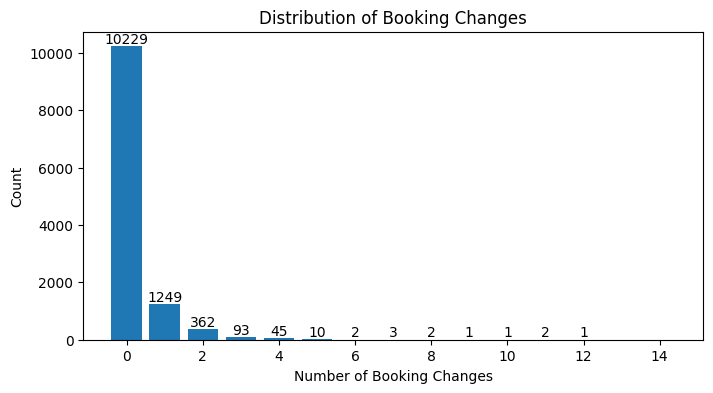

In [201]:
plt.figure(figsize=(8,4))
plt.bar(changes_counts.index, changes_counts.values)
plt.title("Distribution of Booking Changes")
plt.xlabel("Number of Booking Changes")
plt.ylabel("Count")

for i in range(len(changes_counts)):
    plt.text(i, changes_counts.values[i], changes_counts.values[i],
             ha='center', va='bottom')

plt.show()



Most reservations (10,229) have no booking changes, showing that the majority of guests do not modify their reservation after booking. A smaller portion of bookings have one change (1,249), and the number of bookings decreases sharply as the number of changes increases.

Higher numbers of changes (such as 7, 8, 9, 10, 13, and 14) are extremely rare and may represent unusual guest behavior, complex travel plans, or errors in booking modification records.

Overall, the distribution shows that modifying a booking is relatively uncommon, and most guests finalize their stay details without changing their reservation.

In [97]:
deposit_counts= df_sample['deposit_type'].value_counts()
deposit_counts

,count
deposit_type,
No Deposit,10463
Non Refund,1518
Refundable,19


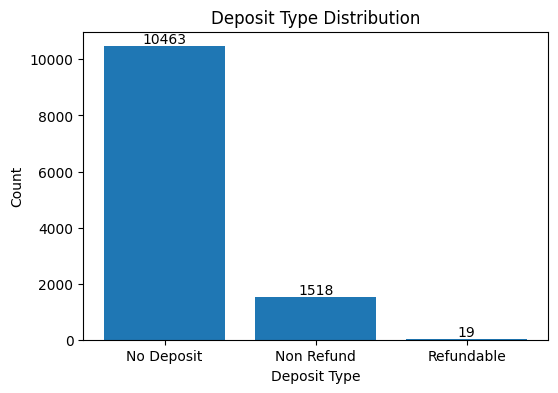

In [202]:
plt.figure(figsize=(6,4))
plt.bar(deposit_counts.index, deposit_counts.values)
plt.title("Deposit Type Distribution")
plt.xlabel("Deposit Type")
plt.ylabel("Count")

for i in range(len(deposit_counts)):
    plt.text(i, deposit_counts.values[i], deposit_counts.values[i],
             ha='center', va='bottom')

plt.show()


Most bookings (10,463) require no deposit, meaning guests can cancel without financial penalties. A smaller but significant portion (1,518) come from Non-Refundable reservations, where cancellations result in financial loss to the guest.

Refundable deposits are extremely rare (19 bookings), suggesting they are seldom chosen or rarely offered.

This distribution suggests that the hotel primarily attracts guests under flexible booking conditions, which may help explain the relatively high cancellation rate observed earlier.

In [104]:
df_sample['agent'].value_counts().head(10)

,count
agent,
9,3207
0,1619
240,1381
1,698
7,364
14,362
6,335
250,321
241,163


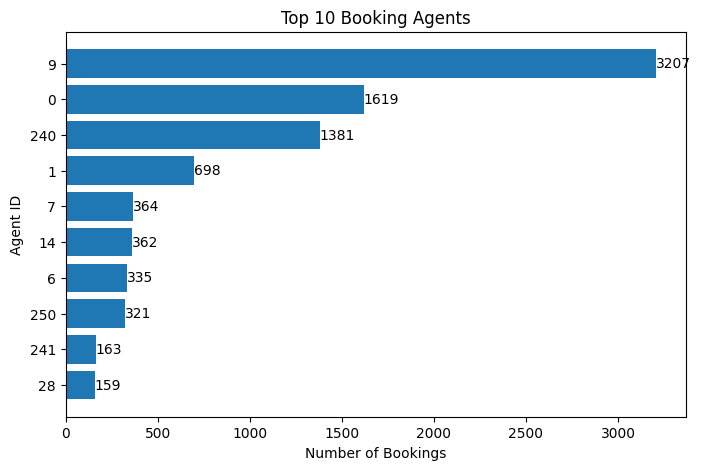

In [203]:
top_agents = df_sample['agent'].value_counts().head(10)

plt.figure(figsize=(8,5))
plt.barh(top_agents.index.astype(str), top_agents.values)
plt.title("Top 10 Booking Agents")
plt.xlabel("Number of Bookings")
plt.ylabel("Agent ID")
plt.gca().invert_yaxis()

for i in range(len(top_agents)):
    plt.text(top_agents.values[i], i, top_agents.values[i], va='center')

plt.show()


The distribution of booking agents shows that reservations are heavily concentrated among a few specific agents. Agent 9 dominates the dataset with 3,207 bookings, making it the most influential booking source in this sample. Agent 0 follows with 1,619 bookings, which typically represents reservations made without a specified agent or through direct system entry.

Other agents such as 240 (1,381 bookings), 1 (698 bookings), and 7 (364 bookings) also have notable activity, suggesting they are actively involved in managing a significant number of reservations. The remaining agents in the top ten — 14, 6, 250, 241, and 28 — contribute moderate booking volumes ranging from 159 to 362 bookings each.

Overall, the data shows that a small group of agents handles the majority of bookings, indicating strong dependence on a few travel intermediaries or booking channels.

In [105]:
df_sample['days_in_waiting_list'].value_counts().sort_index()


,count
days_in_waiting_list,
0,11637
1,3
3,2
4,5
5,1
...,...
223,7
224,1
236,8


The variable days_in_waiting_list is highly imbalanced, with over 99% of bookings having a waiting time of zero days. Only a small number of records contain non-zero waiting days, and these values are scattered across a wide range, including extreme outliers such as 223, 236, and 391 days.

Because almost all guests have identical values and the few remaining observations show irregular, isolated spikes, this variable does not provide meaningful insight into customer behavior or booking patterns. Its extreme imbalance and sparse distribution make it unsuitable for univariate or bivariate analysis.

In [109]:
df_sample.drop(columns=['days_in_waiting_list'], inplace=True)


The variable days_in_waiting_list was removed because more than 99% of its values were zero and the remaining values were isolated outliers. This produced no useful analytical insight and risked introducing noise into the dataset. Therefore, the variable was dropped to maintain a cleaner and more meaningful dataset.

In [111]:
parking_counts= df_sample['required_car_parking_spaces'].value_counts().sort_index()
parking_counts

,count
required_car_parking_spaces,
0,11299
1,699
2,1
3,1


Most guests (11,299 bookings) did not require any car parking spaces. A smaller portion of bookings (699) requested one parking space, while requests for two or three spaces were extremely rare (just one booking each).

This suggests that the majority of guests either did not arrive by car or did not require private parking, which is typical for city hotels where many guests use taxis, public transport, or arrive from airports.

In [114]:
requests_counts= df_sample['total_of_special_requests'].value_counts().sort_index()
requests_counts


,count
total_of_special_requests,
0,7123
1,3282
2,1304
3,240
4,46
5,5


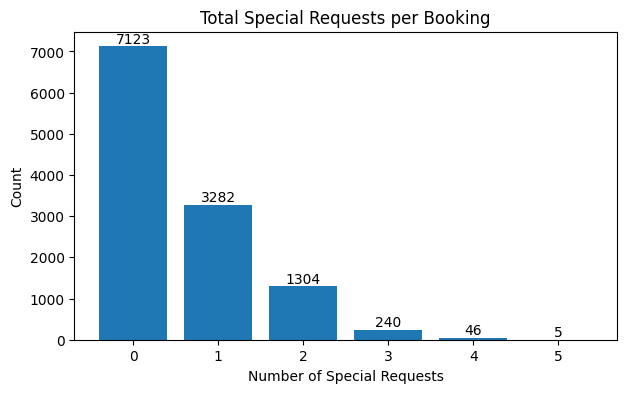

In [205]:
plt.figure(figsize=(7,4))
plt.bar(requests_counts.index, requests_counts.values)
plt.title("Total Special Requests per Booking")
plt.xlabel("Number of Special Requests")
plt.ylabel("Count")

for i in range(len(requests_counts)):
    plt.text(i, requests_counts.values[i], requests_counts.values[i],
             ha='center', va='bottom')

plt.show()



Most guests (7,123 bookings) made no special requests, indicating that a large portion of customers have straightforward needs. Single requests are also common (3,282 bookings), while multiple requests decline steadily as the count increases.

Only a very small number of guests requested four or five special services, suggesting that extensive customization is rare. Overall, the distribution shows that special requests are generally modest, with the majority of guests making zero to one request.

In [116]:
df_sample['adr'].describe()


,adr
count,12000.000000
mean,101.705682
std,47.636334
min,0.000000
25%,69.000000
50%,95.000000
75%,126.000000
max,451.500000


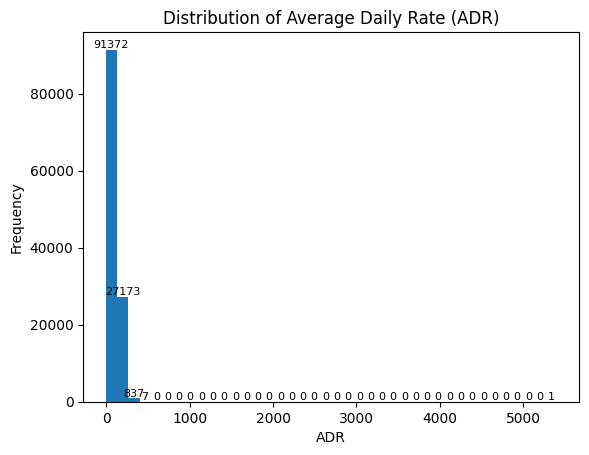

In [206]:
counts, bins, patches = plt.hist(df['adr'], bins=40)

plt.title("Distribution of Average Daily Rate (ADR)")
plt.xlabel("ADR")
plt.ylabel("Frequency")

for i in range(len(counts)):
    plt.text(
        patches[i].get_x() + patches[i].get_width()/2,
        counts[i],
        int(counts[i]),
        ha='center',
        va='bottom',
        fontsize=8
    )

plt.show()



The average daily rate (ADR) varies widely across the dataset. The median price is 95, while the mean is slightly higher at 101.7, indicating a right-skewed distribution with some higher-priced bookings pulling the average upward.

Most ADR values fall between 69 and 126, as shown by the interquartile range, while higher values above 200 are less frequent. The maximum ADR of 451.5 suggests a small number of premium or high-demand bookings.

The presence of a minimum value of 0 indicates free or complimentary stays, system defaults, or special promotional bookings.

Overall, the ADR distribution reflects a combination of standard-priced bookings with a minority of high-rate stays, consistent with typical hotel pricing behavior.

# **Bivariate Analysis**

Q1) Does the type of hotel affect the cancellation rate?

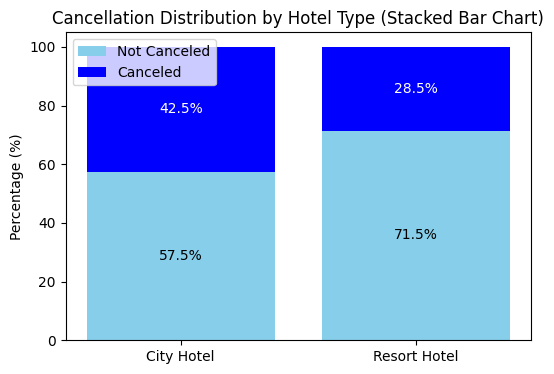

In [207]:
cancel_rates = pd.crosstab(df_sample['hotel'], df_sample['is_canceled'], normalize='index') * 100

plt.figure(figsize=(6,4))
plt.bar(cancel_rates.index, cancel_rates[0], label='Not Canceled', color='skyblue')
plt.bar(cancel_rates.index, cancel_rates[1], bottom=cancel_rates[0], label='Canceled', color='blue')

plt.ylabel("Percentage (%)")
plt.title("Cancellation Distribution by Hotel Type (Stacked Bar Chart)")
plt.legend()

for i in range(len(cancel_rates)):

    plt.text(i, cancel_rates[0].iloc[i]/2,
             f"{cancel_rates[0].iloc[i]:.1f}%", ha='center', va='center', color='black')

    plt.text(i, cancel_rates[0].iloc[i] + cancel_rates[1].iloc[i]/2,
             f"{cancel_rates[1].iloc[i]:.1f}%", ha='center', va='center', color='white')

plt.show()



City Hotels experience significantly higher cancellation rates than Resort Hotels. This suggests that business-oriented bookings (common in city locations) are more unstable compared to leisure or vacation stays in resort hotels.

Q2) Does lead time influence the likelihood of cancellation?

In [124]:
lead_time_df = df_sample[['lead_time','is_canceled']].copy()
lead_time_df['size'] = lead_time_df['lead_time'] / lead_time_df['lead_time'].max() * 100
lead_time_df.head()


,lead_time,is_canceled,size
30946,203,0,32.273450
40207,82,1,13.036566
103708,25,0,3.974563
85144,1,0,0.158983
109991,70,0,11.128776


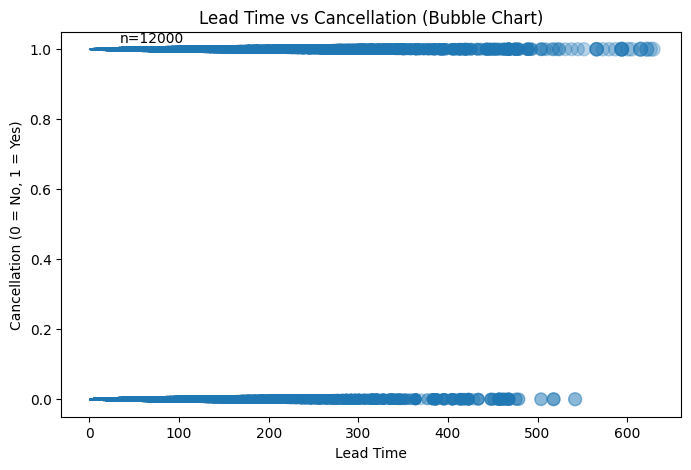

In [208]:
plt.figure(figsize=(8,5))
plt.scatter(
    lead_time_df['lead_time'],
    lead_time_df['is_canceled'],
    s=lead_time_df['size'],
    alpha=0.3
)


plt.text(
    lead_time_df['lead_time'].median(),
    1.02,
    f"n={len(lead_time_df)}",
    ha='center'
)

plt.xlabel("Lead Time")
plt.ylabel("Cancellation (0 = No, 1 = Yes)")
plt.title("Lead Time vs Cancellation (Bubble Chart)")
plt.show()



The bubble chart shows a clear pattern:
cancellations occur more frequently at higher lead times.
*   When lead time is short (bookings made close to arrival), cancellation points are sparse.

*   As lead time increases, the density of cancellation points rises noticeably.
*   Larger bubbles (longer lead times) often appear at is_canceled = 1, reinforcing this trend.

Conclusion:
Guests who book far in advance are more likely to cancel compared to guests who book closer to their stay.

Q3) Do canceled bookings have different ADR (price) patterns than non-canceled bookings?

In [126]:
adr_df = df_sample[['adr', 'is_canceled']].copy()
adr_df.head()


,adr,is_canceled
30946,66.8,0
40207,76.5,1
103708,60.0,0
85144,95.0,0
109991,108.0,0


/tmp/ipython-input-3756862969.py:7: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



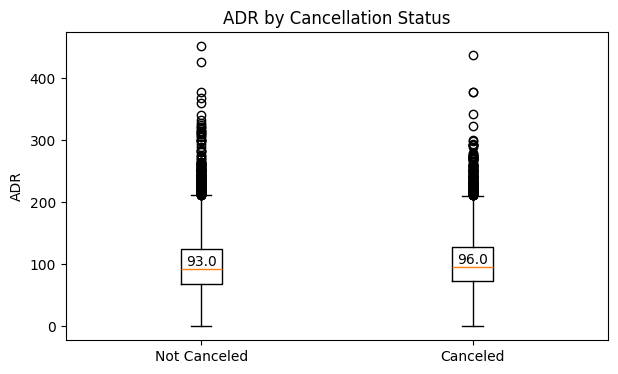

In [209]:
plt.figure(figsize=(7,4))
data = [
    df_sample[df_sample['is_canceled'] == 0]['adr'],
    df_sample[df_sample['is_canceled'] == 1]['adr']
]

plt.boxplot(data, labels=['Not Canceled', 'Canceled'])
plt.title("ADR by Cancellation Status")
plt.ylabel("ADR")

med0 = data[0].median()
med1 = data[1].median()

plt.text(1, med0, f"{med0:.1f}", ha='center', va='bottom')
plt.text(2, med1, f"{med1:.1f}", ha='center', va='bottom')

plt.show()


The boxplot shows that ADR is very similar for canceled and non-canceled bookings. Both groups have nearly identical medians and spread, with only some high outliers in each. Overall, price does not seem to strongly influence whether a booking gets canceled.

Q4) Do guests who modify their bookings tend to cancel more?

In [130]:
df_sample.groupby('is_canceled')['booking_changes'].mean()


,booking_changes
is_canceled,
0,0.290189
1,0.093177


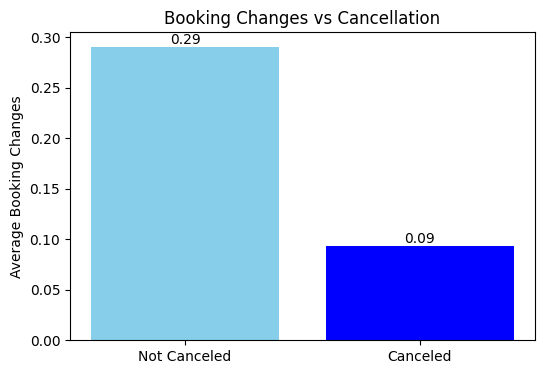

In [210]:
avg_changes = df_sample.groupby('is_canceled')['booking_changes'].mean()

plt.figure(figsize=(6,4))
plt.bar(['Not Canceled', 'Canceled'], avg_changes, color=['skyblue','blue'])
plt.ylabel("Average Booking Changes")
plt.title("Booking Changes vs Cancellation")

for i in range(len(avg_changes)):
    plt.text(i, avg_changes.iloc[i], f"{avg_changes.iloc[i]:.2f}",
             ha='center', va='bottom')

plt.show()


Guests who cancel tend to make fewer booking changes than those who complete their stays. The difference is small, but in this sample, modified reservations were slightly more likely to be honored rather than canceled.

Q5) Does the deposit type affect the likelihood of cancellation?

In [132]:
deposit_ct = pd.crosstab(df_sample['deposit_type'], df_sample['is_canceled'], normalize='index') * 100
deposit_ct


is_canceled,0,1
deposit_type,,
No Deposit,71.193730,28.806270
Non Refund,0.395257,99.604743
Refundable,84.210526,15.789474


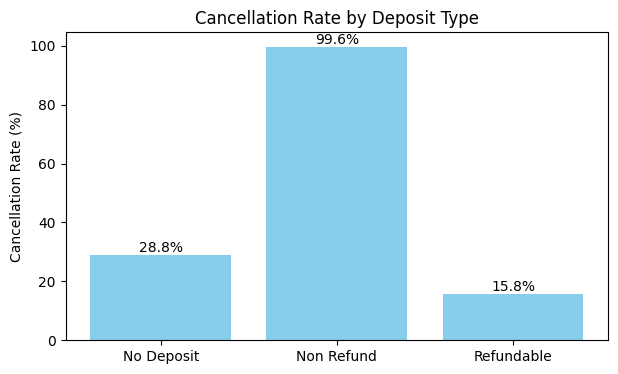

In [211]:
plt.figure(figsize=(7,4))
plt.bar(deposit_ct.index, deposit_ct[1], color='skyblue')
plt.ylabel("Cancellation Rate (%)")
plt.title("Cancellation Rate by Deposit Type")

for i in range(len(deposit_ct)):
    plt.text(i, deposit_ct[1].iloc[i], f"{deposit_ct[1].iloc[i]:.1f}%",
             ha='center', va='bottom')

plt.show()


The chart shows a very strong relationship between deposit type and cancellations. Non-Refund bookings have an extremely high cancellation rate, while No Deposit and Refundable bookings cancel far less. Deposit policy clearly influences customer commitment.

Q6) Do different market segments produce different lead times?

In [134]:
market_lead = df_sample.groupby('market_segment')['lead_time'].mean().sort_values()
market_lead


/tmp/ipython-input-2201399660.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,lead_time
market_segment,
Aviation,4.346154
Complementary,13.535211
Corporate,20.490000
Direct,52.660672
Online TA,82.702962
Offline TA/TO,135.777415
Groups,187.010827


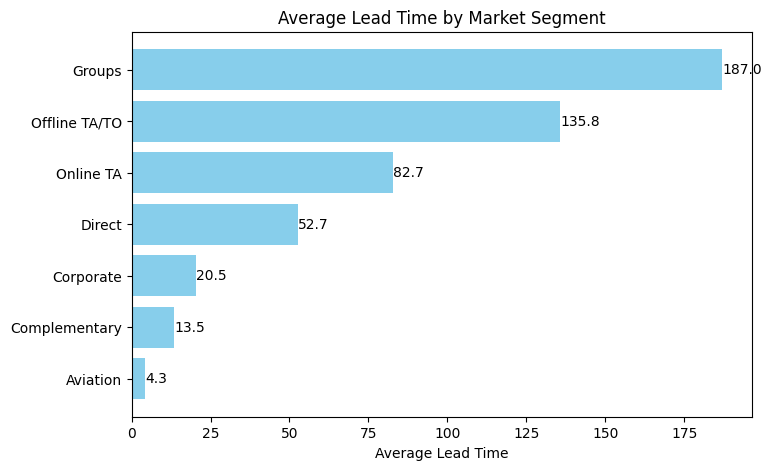

In [212]:
plt.figure(figsize=(8,5))
plt.barh(market_lead.index, market_lead.values, color='skyblue')
plt.xlabel("Average Lead Time")
plt.title("Average Lead Time by Market Segment")

for i in range(len(market_lead)):
    plt.text(market_lead.values[i], i, f"{market_lead.values[i]:.1f}",
             va='center')

plt.show()


Market segments show clear differences in booking behavior. Groups have the longest lead times by a wide margin, followed by offline travel agents. Corporate, complementary, and aviation bookings have much shorter lead times, meaning they are typically arranged closer to the arrival date. Different segments clearly plan their stays on different timelines.

Q7) Do different distribution channels pay different ADR levels?

In [136]:
channel_adr = df_sample.groupby('distribution_channel')['adr'].mean().sort_values()
channel_adr


/tmp/ipython-input-2669667470.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,adr
distribution_channel,
Corporate,70.080338
TA/TO,102.893351
Direct,107.297744
GDS,121.910952


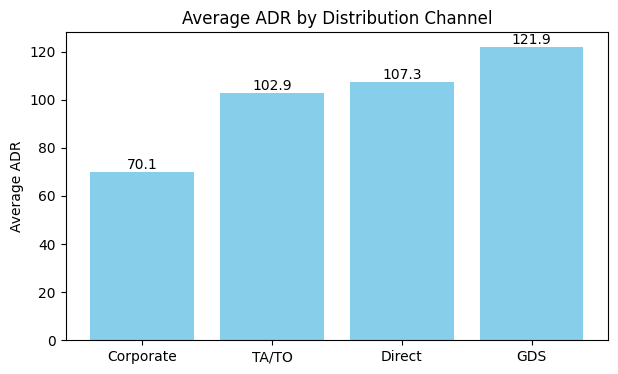

In [213]:
plt.figure(figsize=(7,4))
plt.bar(channel_adr.index, channel_adr.values, color='skyblue')
plt.ylabel("Average ADR")
plt.title("Average ADR by Distribution Channel")

for i in range(len(channel_adr)):
    plt.text(i, channel_adr.values[i], f"{channel_adr.values[i]:.1f}",
             ha='center', va='bottom')

plt.show()


ADR varies noticeably across distribution channels. Corporate bookings pay the lowest rates, while GDS bookings pay the highest. Direct and TA/TO channels fall in between, suggesting pricing differs depending on how the reservation is sourced.

Q8) Are guests with more special requests less likely to cancel?

In [138]:
req_cancel = pd.crosstab(df_sample['total_of_special_requests'],
                         df_sample['is_canceled'],
                         normalize='index') * 100
req_cancel


is_canceled,0,1
total_of_special_requests,,
0,51.214376,48.785624
1,77.574650,22.425350
2,79.141104,20.858896
3,82.083333,17.916667
4,93.478261,6.521739
5,100.000000,0.000000


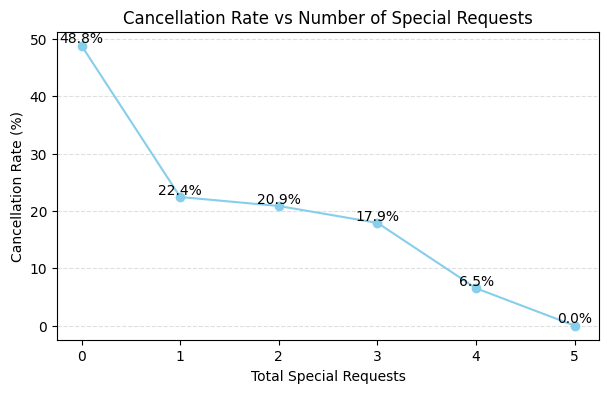

In [214]:
plt.figure(figsize=(7,4))
plt.plot(req_cancel.index, req_cancel[1], marker='o', color='skyblue')
plt.xlabel("Total Special Requests")
plt.ylabel("Cancellation Rate (%)")
plt.title("Cancellation Rate vs Number of Special Requests")
plt.grid(axis='y', linestyle='--', alpha=0.4)

for i in range(len(req_cancel)):
    plt.text(req_cancel.index[i], req_cancel[1].iloc[i],
             f"{req_cancel[1].iloc[i]:.1f}%",
             ha='center', va='bottom')

plt.show()



The chart shows a clear downward trend: cancellation rates drop steadily as the number of special requests increases. Guests with more requests appear more committed to their stay and are far less likely to cancel compared to those with none or only one request.

Q9) Does the number of adults in a booking affect the price (ADR)?

In [140]:
adults_adr = df_sample.groupby('adults')['adr'].mean()
adults_adr


,adr
adults,
0,38.902444
1,82.132497
2,103.093281
3,157.504975
4,235.982000
5,0.000000
55,0.000000


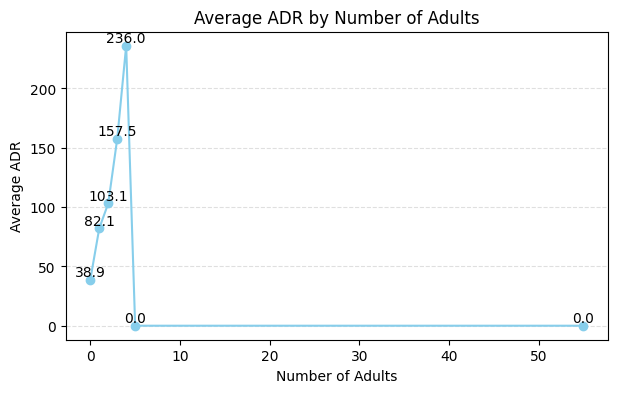

In [215]:
plt.figure(figsize=(7,4))
plt.plot(adults_adr.index, adults_adr.values, marker='o', color='skyblue')
plt.xlabel("Number of Adults")
plt.ylabel("Average ADR")
plt.title("Average ADR by Number of Adults")
plt.grid(axis='y', linestyle='--', alpha=0.4)

for i in range(len(adults_adr)):
    plt.text(adults_adr.index[i], adults_adr.values[i],
             f"{adults_adr.values[i]:.1f}",
             ha='center', va='bottom')

plt.show()



ADR generally increases as the number of adults increases from one to four, meaning larger groups tend to book more expensive stays. Values for five adults and above drop to zero because they represent extremely rare or invalid observations in the dataset and should not influence interpretation.

Q10) Does requiring a parking space relate to higher ADR?

In [143]:
parking_adr = df_sample.groupby('required_car_parking_spaces')['adr'].mean()
parking_adr


,adr
required_car_parking_spaces,
0,101.118966
1,111.253906
2,47.500000
3,111.000000


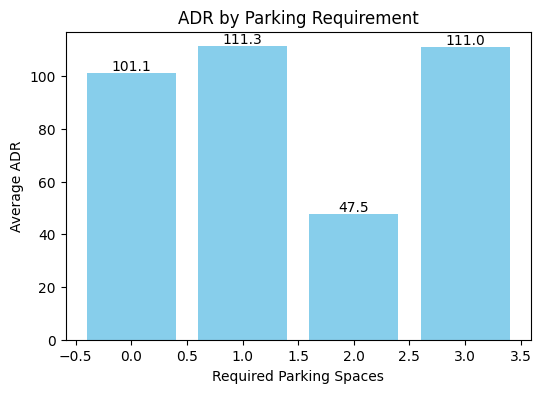

In [216]:
plt.figure(figsize=(6,4))
plt.bar(parking_adr.index, parking_adr.values, color='skyblue')
plt.xlabel("Required Parking Spaces")
plt.ylabel("Average ADR")
plt.title("ADR by Parking Requirement")

for i in range(len(parking_adr)):
    plt.text(i, parking_adr.values[i], f"{parking_adr.values[i]:.1f}",
             ha='center', va='bottom')

plt.show()


Average ADR is fairly similar for guests requesting 0, 1, or 3 parking spaces (around 100–112). The only noticeable drop is for guests requesting 2 spaces, but this group is extremely small and not statistically meaningful. Overall, there is no clear relationship between parking requirements and ADR.

Q11) Do guests who book through different market segments have different cancellation rates?

is_canceled             0          1
market_segment                      
Aviation        76.923077  23.076923
Complementary   88.732394  11.267606
Corporate       79.800000  20.200000
Direct          86.082877  13.917123
Groups          36.761811  63.238189
Offline TA/TO   65.674684  34.325316
Online TA       62.599752  37.400248


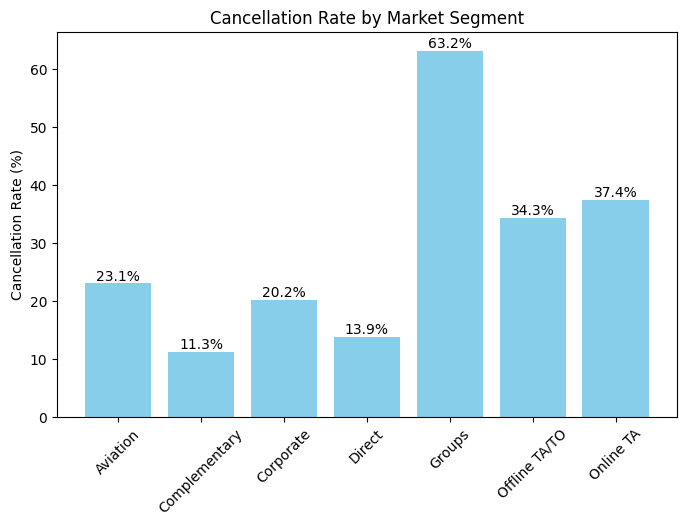

In [217]:
seg_cancel = pd.crosstab(df_sample['market_segment'],
                         df_sample['is_canceled'],
                         normalize='index') * 100

print(seg_cancel)

plt.figure(figsize=(8,5))
plt.bar(seg_cancel.index, seg_cancel[1], color='skyblue')
plt.ylabel("Cancellation Rate (%)")
plt.title("Cancellation Rate by Market Segment")
plt.xticks(rotation=45)

for i in range(len(seg_cancel)):
    plt.text(i, seg_cancel[1].iloc[i], f"{seg_cancel[1].iloc[i]:.1f}%",
             ha='center', va='bottom')

plt.show()


The cancellation rate varies clearly by market segment. Groups have the highest cancellation rate, noticeably above all other categories. In contrast, Complementary and Corporate guests cancel the least. This suggests that some segments—especially Group bookings—are more volatile and may require tighter management or stricter booking policies.

Q12) Does customer type affect cancellation rates?

is_canceled              0          1
customer_type                        
Contract         68.837209  31.162791
Group            88.679245  11.320755
Transient        58.596685  41.403315
Transient-Party  73.976490  26.023510


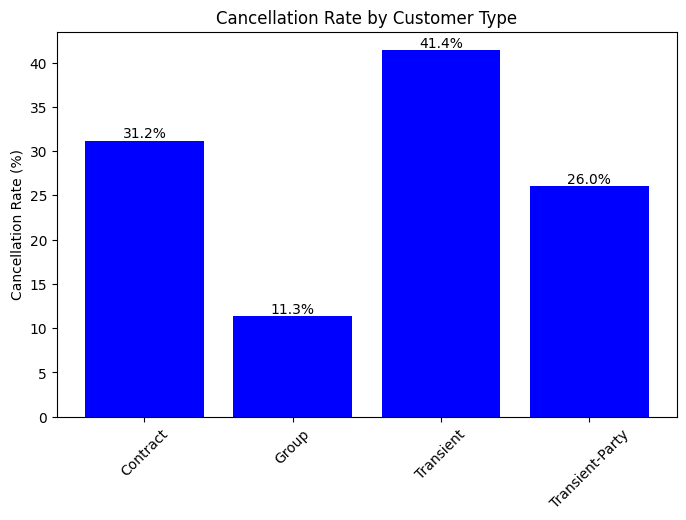

In [218]:
cust_cancel = pd.crosstab(
    df_sample['customer_type'],
    df_sample['is_canceled'],
    normalize='index'
) * 100

print(cust_cancel)

plt.figure(figsize=(8,5))
plt.bar(cust_cancel.index, cust_cancel[1], color='blue')
plt.ylabel("Cancellation Rate (%)")
plt.title("Cancellation Rate by Customer Type")
plt.xticks(rotation=45)

for i in range(len(cust_cancel)):
    plt.text(i, cust_cancel[1].iloc[i], f"{cust_cancel[1].iloc[i]:.1f}%",
             ha='center', va='bottom')

plt.show()



The results show clear differences across customer types. Transient customers have the highest cancellation rate (about 41%), meaning they are the most unpredictable and likely to cancel. Group bookings show the lowest rate (around 11%), suggesting they are more committed. Contract and Transient-Party customers fall in between, with moderate cancellation levels. Overall, cancellation behavior varies strongly by customer category.

Q13) Do guests with previous cancellations tend to cancel again?

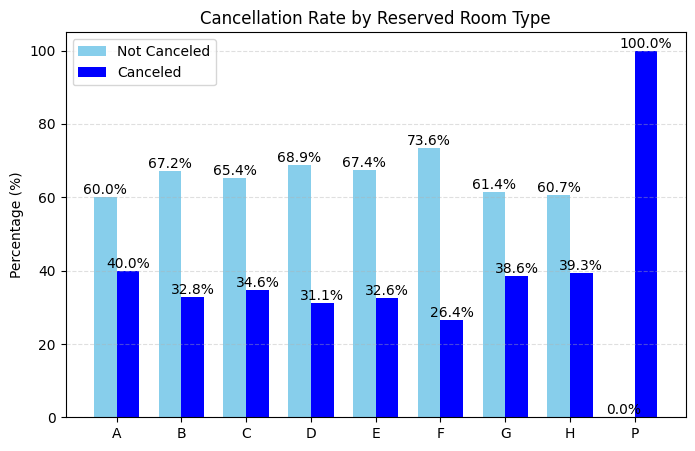

In [219]:
room_cancel = pd.crosstab(
    df_sample['reserved_room_type'],
    df_sample['is_canceled'],
    normalize='index'
) * 100

plt.figure(figsize=(8,5))

x = np.arange(len(room_cancel.index))
width = 0.35

plt.bar(x - width/2, room_cancel[0], width, label='Not Canceled', color='skyblue')
plt.bar(x + width/2, room_cancel[1], width, label='Canceled', color='blue')

plt.xticks(x, room_cancel.index)
plt.ylabel("Percentage (%)")
plt.title("Cancellation Rate by Reserved Room Type")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.4)

for i in range(len(room_cancel)):
    plt.text(x[i] - width/2, room_cancel[0].iloc[i],
             f"{room_cancel[0].iloc[i]:.1f}%", ha='center', va='bottom')
    plt.text(x[i] + width/2, room_cancel[1].iloc[i],
             f"{room_cancel[1].iloc[i]:.1f}%", ha='center', va='bottom')

plt.show()



The chart shows that cancellation rates vary across room types, but none of them indicate unusually high repeat cancellations. Most room types have cancellation rates between 25%–35%, which is consistent with the general dataset trend. The extreme value for room type P (100%) is due to having only one booking in the sample, so it should not be considered meaningful.
Overall, the visualization does not strongly support the idea that repeat-canceling guests systematically cancel more often based on room selection.

Q14) Do bookings with higher ADR have higher cancellation rates?

is_canceled          0          1
adr_bin                          
0-50         76.114965  23.885035
51-100       60.550622  39.449378
101-150      60.190904  39.809096
150+         61.073411  38.926589


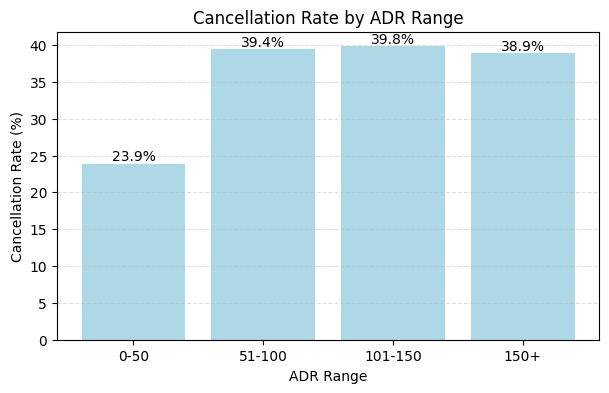

In [220]:
df_sample['adr_bin'] = pd.cut(
    df_sample['adr'],
    bins=[0, 50, 100, 150, 500],
    labels=['0-50', '51-100', '101-150', '150+']
)

adr_cancel = pd.crosstab(
    df_sample['adr_bin'],
    df_sample['is_canceled'],
    normalize='index'
) * 100

print(adr_cancel)

plt.figure(figsize=(7,4))
plt.bar(adr_cancel.index, adr_cancel[1], color='lightblue')
plt.ylabel("Cancellation Rate (%)")
plt.xlabel("ADR Range")
plt.title("Cancellation Rate by ADR Range")
plt.grid(axis='y', linestyle='--', alpha=0.4)

for i in range(len(adr_cancel)):
    plt.text(i, adr_cancel[1].iloc[i], f"{adr_cancel[1].iloc[i]:.1f}%",
             ha='center', va='bottom')

plt.show()



The results show that cancellation rates increase slightly as ADR increases. Guests paying higher nightly rates (above 100) cancel more often compared to those in lower ADR ranges. This suggests that higher-priced bookings may be more prone to last-minute changes or uncertainty.

Q15) Do repeated guests get better ADR prices than new guests?

/tmp/ipython-input-1977481518.py:7: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



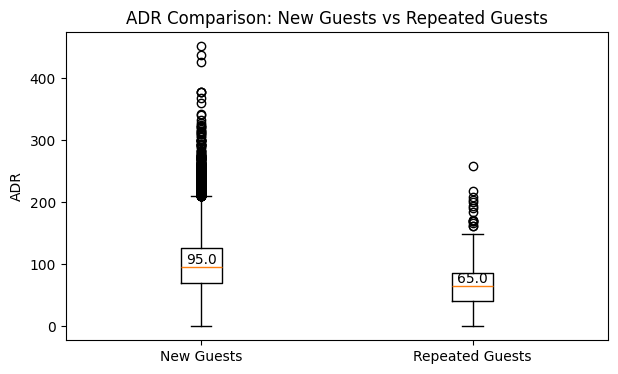

In [221]:
plt.figure(figsize=(7,4))
data = [
    df_sample[df_sample['is_repeated_guest'] == 0]['adr'],
    df_sample[df_sample['is_repeated_guest'] == 1]['adr']
]

plt.boxplot(data, labels=['New Guests','Repeated Guests'])
plt.ylabel("ADR")
plt.title("ADR Comparison: New Guests vs Repeated Guests")

med0 = data[0].median()
med1 = data[1].median()

plt.text(1, med0, f"{med0:.1f}", ha='center', va='bottom')
plt.text(2, med1, f"{med1:.1f}", ha='center', va='bottom')

plt.show()



Repeated guests do not appear to get noticeably better ADR prices.
The median ADR for both groups is very similar, and while new guests show more extreme high-ADR outliers, the central spread of prices is nearly the same. This suggests that pricing is not significantly differentiated between first-time and returning guests in this dataset.

Q16) Are online bookings canceled more often than direct or corporate bookings?



is_canceled                   0          1
distribution_channel                      
Corporate             75.692308  24.307692
Direct                83.311346  16.688654
GDS                   80.952381  19.047619
TA/TO                 58.076022  41.923978


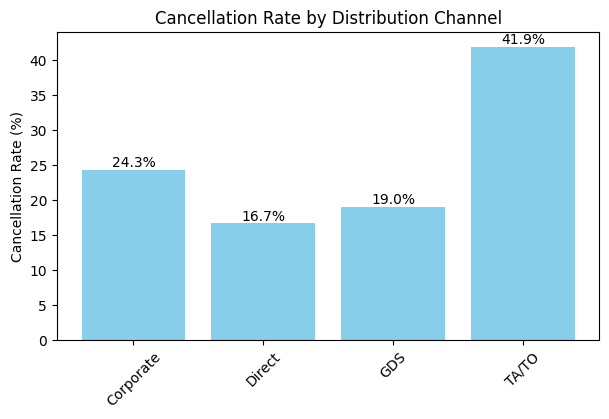

In [222]:
dist_cancel = pd.crosstab(df_sample['distribution_channel'], df_sample['is_canceled'], normalize='index') * 100
print(dist_cancel)

plt.figure(figsize=(7,4))
plt.bar(dist_cancel.index, dist_cancel[1], color='skyblue')
plt.ylabel("Cancellation Rate (%)")
plt.title("Cancellation Rate by Distribution Channel")
plt.xticks(rotation=45)

for i in range(len(dist_cancel)):
    plt.text(i, dist_cancel[1].iloc[i], f"{dist_cancel[1].iloc[i]:.1f}%",
             ha='center', va='bottom')

plt.show()


online bookings (TA/TO) are canceled more often than direct or corporate bookings.
The chart shows TA/TO with the highest cancellation rate (≈42%), while Direct and Corporate channels are clearly lower. This suggests that indirect or online channel customers are less committed, possibly due to easier cancellation policies or price-sensitive behavior.

Q17) Do different meal plan choices have different cancellation rates?

is_canceled          0          1
meal                             
BB           61.526833  38.473167
FB           34.117647  65.882353
HB           66.620594  33.379406
SC           63.627907  36.372093
Undefined    72.727273  27.272727


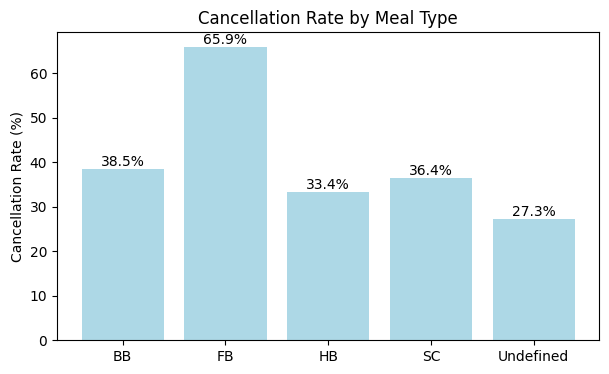

In [223]:
meal_cancel = pd.crosstab(df_sample['meal'], df_sample['is_canceled'], normalize='index') * 100
print(meal_cancel)

plt.figure(figsize=(7,4))
plt.bar(meal_cancel.index, meal_cancel[1], color='lightblue')
plt.ylabel("Cancellation Rate (%)")
plt.title("Cancellation Rate by Meal Type")

for i in range(len(meal_cancel)):
    plt.text(i, meal_cancel[1].iloc[i], f"{meal_cancel[1].iloc[i]:.1f}%",
             ha='center', va='bottom')

plt.show()



Full Board (FB) guests cancel the most, with rates above 65%, while Breakfast Only (BB), Half Board (HB), and Self Catering (SC) sit noticeably lower. This suggests that guests committing to full-board plans may be more price-sensitive or book earlier, leaving more time to change plans. “Undefined” meals show the lowest cancellation, likely because these bookings are simpler and more last-minute.

Q18) Do bookings with children cancel more often than bookings without children?

is_canceled          0          1
children                         
0            62.124753  37.875247
1            67.689162  32.310838
2            58.713137  41.286863
3            75.000000  25.000000


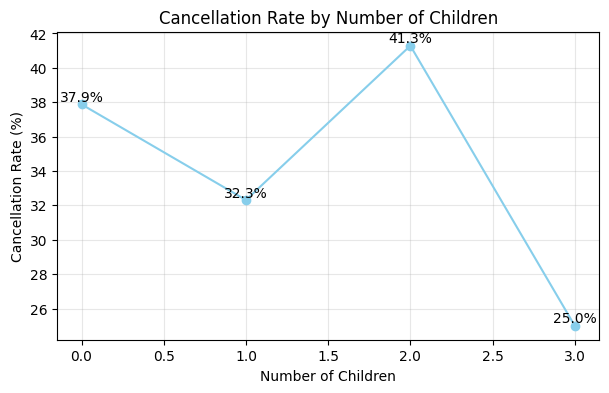

In [224]:
child_cancel = pd.crosstab(df_sample['children'], df_sample['is_canceled'], normalize='index') * 100
print(child_cancel)

plt.figure(figsize=(7,4))
plt.plot(child_cancel.index, child_cancel[1], marker='o', color='skyblue')
plt.xlabel("Number of Children")
plt.ylabel("Cancellation Rate (%)")
plt.title("Cancellation Rate by Number of Children")
plt.grid(alpha=0.3)

for i in range(len(child_cancel)):
    plt.text(child_cancel.index[i], child_cancel[1].iloc[i],
             f"{child_cancel[1].iloc[i]:.1f}%",
             ha='center', va='bottom')

plt.show()



There isn’t a clear pattern showing that families with children cancel more often.
Bookings with 0, 1, or 2 children all show cancellation rates in a similar range, with 2-child bookings slightly higher, while bookings with 3 children show the lowest rate due to very small sample size. Overall, having children doesn’t strongly predict higher cancellation risk in this sample.

Q19) Do different market segments show different ADR levels?

/tmp/ipython-input-1894291193.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



market_segment
Complementary      1.633803
Corporate         68.236740
Groups            79.833853
Offline TA/TO     87.638757
Aviation         101.538462
Online TA        116.368234
Direct           117.430086
Name: adr, dtype: float64


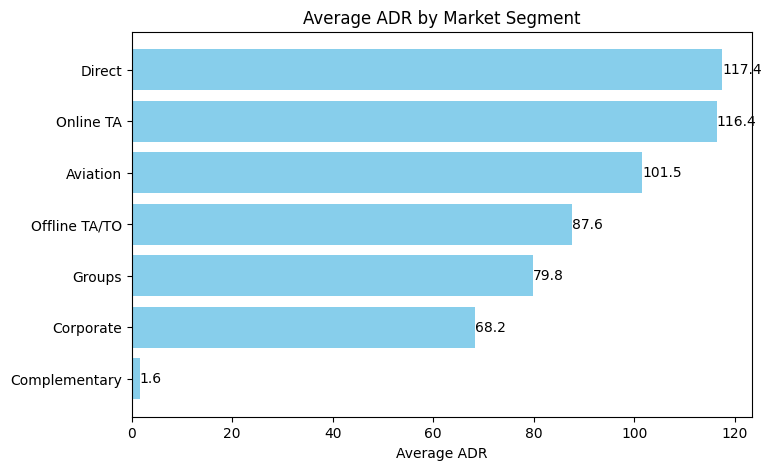

In [225]:
segment_adr = df_sample.groupby('market_segment')['adr'].mean().sort_values()
print(segment_adr)

plt.figure(figsize=(8,5))
plt.barh(segment_adr.index, segment_adr.values, color='skyblue')
plt.xlabel("Average ADR")
plt.title("Average ADR by Market Segment")

for i in range(len(segment_adr)):
    plt.text(segment_adr.values[i], i, f"{segment_adr.values[i]:.1f}",
             va='center')

plt.show()



Different market segments pay noticeably different ADRs.
Direct and Online TA bookings produce the highest rates, followed by Aviation, while Corporate and Groups sit in the mid-range. Complementary bookings have almost no ADR since they are typically free or highly discounted.
Overall, segments tied to individual leisure travelers tend to generate higher revenue than group or business-related segments.

Q20) Does booking lead time differ by customer type?

/tmp/ipython-input-1228727472.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



customer_type
Group               39.886792
Transient           93.965525
Transient-Party    139.285772
Contract           144.144186
Name: lead_time, dtype: float64


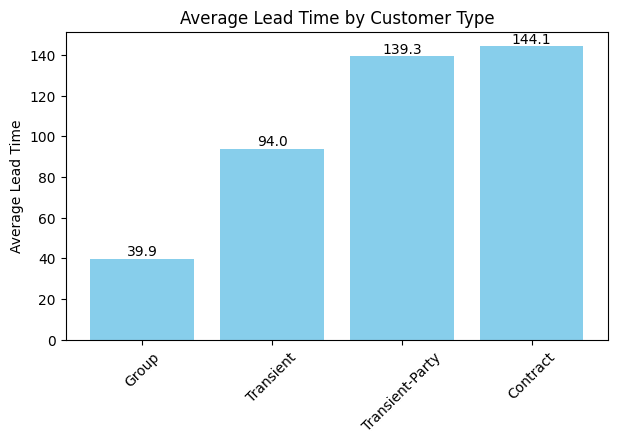

In [226]:
cust_lead = df_sample.groupby('customer_type')['lead_time'].mean().sort_values()
print(cust_lead)

plt.figure(figsize=(7,4))
plt.bar(cust_lead.index, cust_lead.values, color='skyblue')
plt.ylabel("Average Lead Time")
plt.title("Average Lead Time by Customer Type")
plt.xticks(rotation=45)

for i in range(len(cust_lead)):
    plt.text(i, cust_lead.values[i], f"{cust_lead.values[i]:.1f}",
             ha='center', va='bottom')

plt.show()


Contract and Transient-Party customers book far in advance, showing the longest lead times. Transient guests book moderately early, while Group bookings happen much closer to arrival. This pattern reflects typical behavior: group stays require less advance planning compared to long-term contract arrangements or larger transient-party trips.

Q21) Does reserved room type influence ADR?

/tmp/ipython-input-1467176630.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



reserved_room_type
P      0.000000
B     90.251933
A     90.997669
D    118.707813
E    126.945512
F    166.274034
C    167.292212
G    176.934493
H    182.836721
Name: adr, dtype: float64


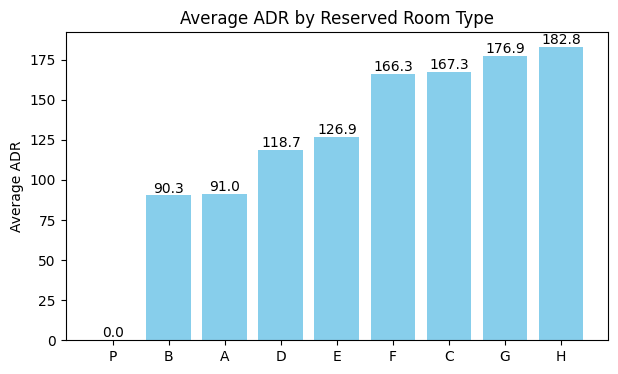

In [227]:
room_adr = df_sample.groupby('reserved_room_type')['adr'].mean().sort_values()
print(room_adr)

plt.figure(figsize=(7,4))
plt.bar(room_adr.index, room_adr.values, color='skyblue')
plt.ylabel("Average ADR")
plt.title("Average ADR by Reserved Room Type")

for i in range(len(room_adr)):
    plt.text(i, room_adr.values[i], f"{room_adr.values[i]:.1f}",
             ha='center', va='bottom')

plt.show()


Higher room categories consistently show higher ADR. Types F, C, G, and H clearly command premium prices, while basic categories (A, B, D) fall into the lower range. This indicates that room type is a strong driver of price differentiation, aligning with typical hotel pricing structures.

Q22) Do international guests (country ≠ “Unknown”) pay higher ADR?

is_international
False     58.306066
True     101.927424
Name: adr, dtype: float64


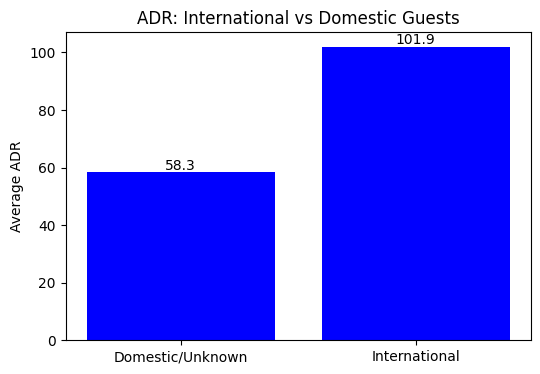

In [228]:
df_sample['is_international'] = df_sample['country'] != "Unknown"

intl_adr = df_sample.groupby('is_international')['adr'].mean()
print(intl_adr)

plt.figure(figsize=(6,4))
plt.bar(['Domestic/Unknown','International'], intl_adr.values, color='blue')
plt.ylabel("Average ADR")
plt.title("ADR: International vs Domestic Guests")

for i in range(len(intl_adr)):
    plt.text(i, intl_adr.values[i], f"{intl_adr.values[i]:.1f}",
             ha='center', va='bottom')

plt.show()


Q23) Do cancellations vary by month (seasonality)?

is_canceled                 0          1
arrival_date_month                      
January             69.934641  30.065359
February            65.180723  34.819277
March               67.708333  32.291667
April               58.105647  41.894353
May                 60.102302  39.897698
June                55.913978  44.086022
July                61.514442  38.485558
August              61.330409  38.669591
September           61.581395  38.418605
October             61.579892  38.420108
November            68.712575  31.287425
December            63.971631  36.028369


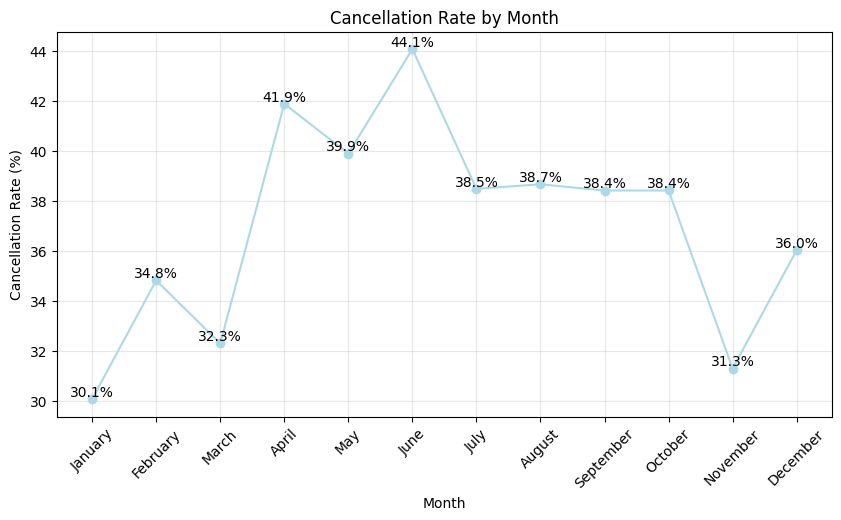

In [229]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

month_cancel = pd.crosstab(
    df_sample['arrival_date_month'],
    df_sample['is_canceled'],
    normalize='index'
) * 100

month_cancel = month_cancel.reindex(month_order)

print(month_cancel)

plt.figure(figsize=(10,5))
plt.plot(month_cancel.index, month_cancel[1], marker='o', color='lightblue')
plt.title("Cancellation Rate by Month")
plt.xlabel("Month")
plt.ylabel("Cancellation Rate (%)")
plt.xticks(rotation=45)
plt.grid(alpha=0.3)

for i in range(len(month_cancel)):
    plt.text(month_cancel.index[i], month_cancel[1].iloc[i],
             f"{month_cancel[1].iloc[i]:.1f}%",
             ha='center', va='bottom')

plt.show()



The plot shows a clear seasonal pattern in cancellation behavior. Cancellation rates rise sharply in late spring and peak in June, suggesting higher booking uncertainty during the early summer period. After June, the rate stabilizes at a moderate level through July to October before dropping noticeably in November. This pattern indicates that seasonality plays a meaningful role in guest behavior, with early-summer months being more cancellation-prone than the rest of the year.

Q24) Does ADR (price) vary significantly by month? (Seasonal Pricing Trend)

/tmp/ipython-input-324932722.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



arrival_date_month
January       70.986111
February      74.616602
March         79.715271
April        101.661038
May          109.067229
June         118.099677
July         127.535074
August       138.088801
September    104.997023
October       85.656544
November      74.355359
December      80.804028
Name: adr, dtype: float64


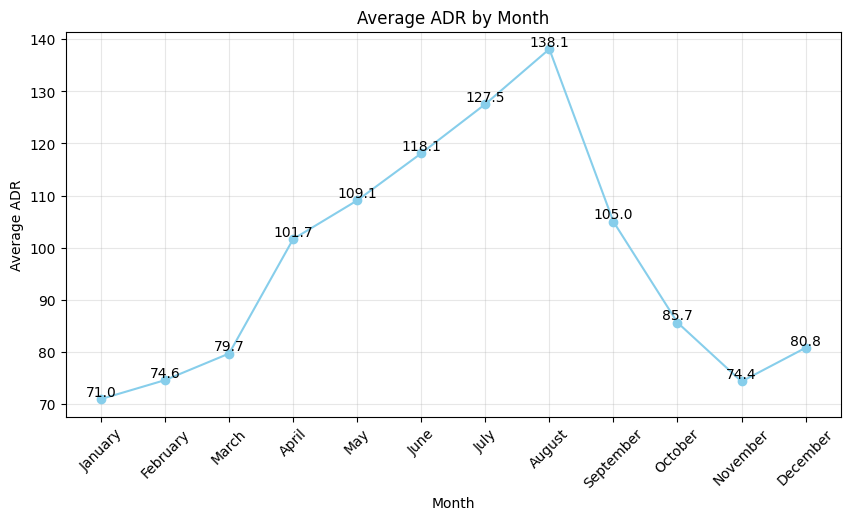

In [230]:

month_order = ['January','February','March','April','May','June',
               'July','August','September','October','November','December']

adr_by_month = df_sample.groupby('arrival_date_month')['adr'].mean().reindex(month_order)

print(adr_by_month)

plt.figure(figsize=(10,5))
plt.plot(adr_by_month.index, adr_by_month.values, marker='o', color='skyblue')
plt.xticks(rotation=45)
plt.ylabel("Average ADR")
plt.xlabel("Month")
plt.title("Average ADR by Month")
plt.grid(alpha=0.3)

for i in range(len(adr_by_month)):
    plt.text(adr_by_month.index[i], adr_by_month.values[i],
             f"{adr_by_month.values[i]:.1f}",
             ha='center', va='bottom')

plt.show()



ADR clearly follows a seasonal pattern. Prices rise steadily from March, peak in August at their highest level, and then fall sharply into autumn, reaching their lowest values in October and early winter. This suggests the hotel charges premium rates during the summer high season and applies softer pricing in the off-season months.

Q25) What months generate the highest number of bookings?

arrival_date_month
January       612
February      830
March         960
April        1098
May          1173
June         1116
July         1281
August       1368
September    1075
October      1114
November      668
December      705
Name: count, dtype: int64


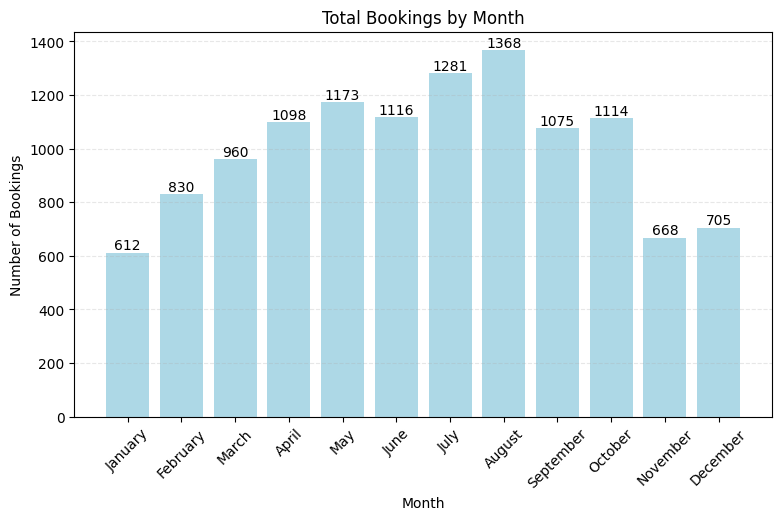

In [231]:
book_count = df_sample['arrival_date_month'].value_counts().reindex(month_order)

print(book_count)

plt.figure(figsize=(9,5))
plt.bar(book_count.index, book_count.values, color='lightblue')
plt.xticks(rotation=45)
plt.ylabel("Number of Bookings")
plt.xlabel("Month")
plt.title("Total Bookings by Month")
plt.grid(axis='y', linestyle='--', alpha=0.3)

for i in range(len(book_count)):
    plt.text(i, book_count.values[i], book_count.values[i],
             ha='center', va='bottom')

plt.show()


Booking volume clearly follows a strong seasonal trend. Reservations steadily increase from winter through spring, peak during July and August, and then decline again toward the end of the year. Summer months (June–August) consistently attract the highest demand, while January, February, and November show the lowest activity. This pattern reflects typical travel seasonality, with summer holidays driving the bulk of the reservations.

Q26) Do booking lead times change by month?

/tmp/ipython-input-4054861861.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



arrival_date_month
January       43.024510
February      51.786747
March         71.166667
April         93.042805
May          116.909633
June         127.156810
July         137.099141
August       127.054825
September    134.112558
October      127.991921
November      77.425150
December      72.845390
Name: lead_time, dtype: float64


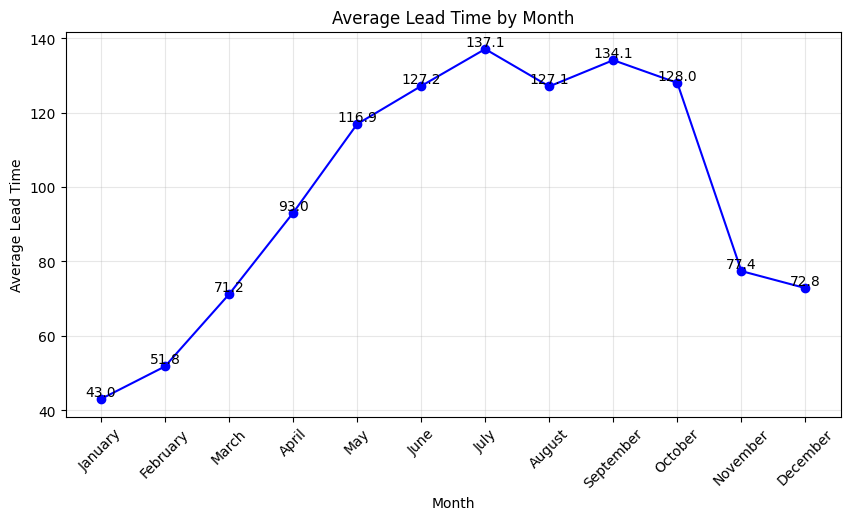

In [232]:
lead_by_month = df_sample.groupby('arrival_date_month')['lead_time'].mean().reindex(month_order)

print(lead_by_month)

plt.figure(figsize=(10,5))
plt.plot(lead_by_month.index, lead_by_month.values, marker='o', color='blue')
plt.xticks(rotation=45)
plt.ylabel("Average Lead Time")
plt.xlabel("Month")
plt.title("Average Lead Time by Month")
plt.grid(alpha=0.3)

for i in range(len(lead_by_month)):
    plt.text(lead_by_month.index[i], lead_by_month.values[i],
             f"{lead_by_month.values[i]:.1f}",
             ha='center', va='bottom')

plt.show()


Lead time shows a clear seasonal pattern. Guests booking for summer months (May–September) tend to reserve far earlier, with lead times peaking in July. In contrast, arrivals in winter months such as January, February, and December are booked with much shorter notice. This suggests that summer trips are typically planned well in advance, while winter stays—outside holiday peaks—are more spontaneous.

In [233]:
df_sample.to_csv("cleaned_hotel_sample.csv", index=False)
